# Introduction

This jupyter notebook reproduces the main figures (the three figures with the rates) from the review by Mandel & Broekgaarden (2021) on "Rates of Compact Object Coalescence". In order to reproduce the figures one needs to download the data that is available on https://zenodo.org/record/7017532  !Make sure to use the latest version of the dataset!

To make the figures from the paper, put all the data (at least 26 files, unless you are only interested in reproducing one of the Compact Object flavors) in one directory that we will refer to in the remaining jupyter notebook as the *path_to_data_directory*. Enter the path to the directory below, and run the jupyter notebook cells. 




### Reference
If you use this data/code for publication, please cite both the paper: Mandel & Broekgaarden (2021) https://arxiv.org/abs/2107.14239 and the dataset on Zenodo through it's doi https://zenodo.org/record/7017532

[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.7017532.svg)](https://doi.org/10.5281/zenodo.7017532)



##### For any questions or inquiry, please email one of or both the authors: 

Ilya Mandel: ilya.mandel@monash.edu  
Floor Broekgaarden: floor.broekgaarden@cfa.harvard.edu

In [1]:
# full path to the directory with all data files   
# change this to your path with the data directory
path_to_data_directory = '/Users/floorbroekgaarden/Projects/GitHub/Rates_of_Compact_Object_Coalescence/Data_Mandel_and_Broekgaarden_2021/'



In [2]:
# the following lines import the `default_scripts` files that contains some global code / settings that are used throughout this jupyter notebook
# if for some reason the python script is not working, or not importing, one can copy paste the code in the script and run it in a cell above/below this block 
# Not all codes / libraries loaded are strictly needed. 

import sys
sys.path.append('.') 
from default_scripts import * 

# just to make the cells appear wider: comment these lines if needed. 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



/Users/floorbroekgaarden/Projects/GitHub/Rates_of_Compact_Object_Coalescence/plottingCode/default_scripts.py:23: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
/Users/floorbroekgaarden/Projects/GitHub/Rates_of_Compact_Object_Coalescence/plottingCode/default_scripts.py:24: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']


# make main figure LRR size/style:

the total vertical length of the BHBH plot reaches: -124 this is information floor uses for deciding the length of the figure - ignore this


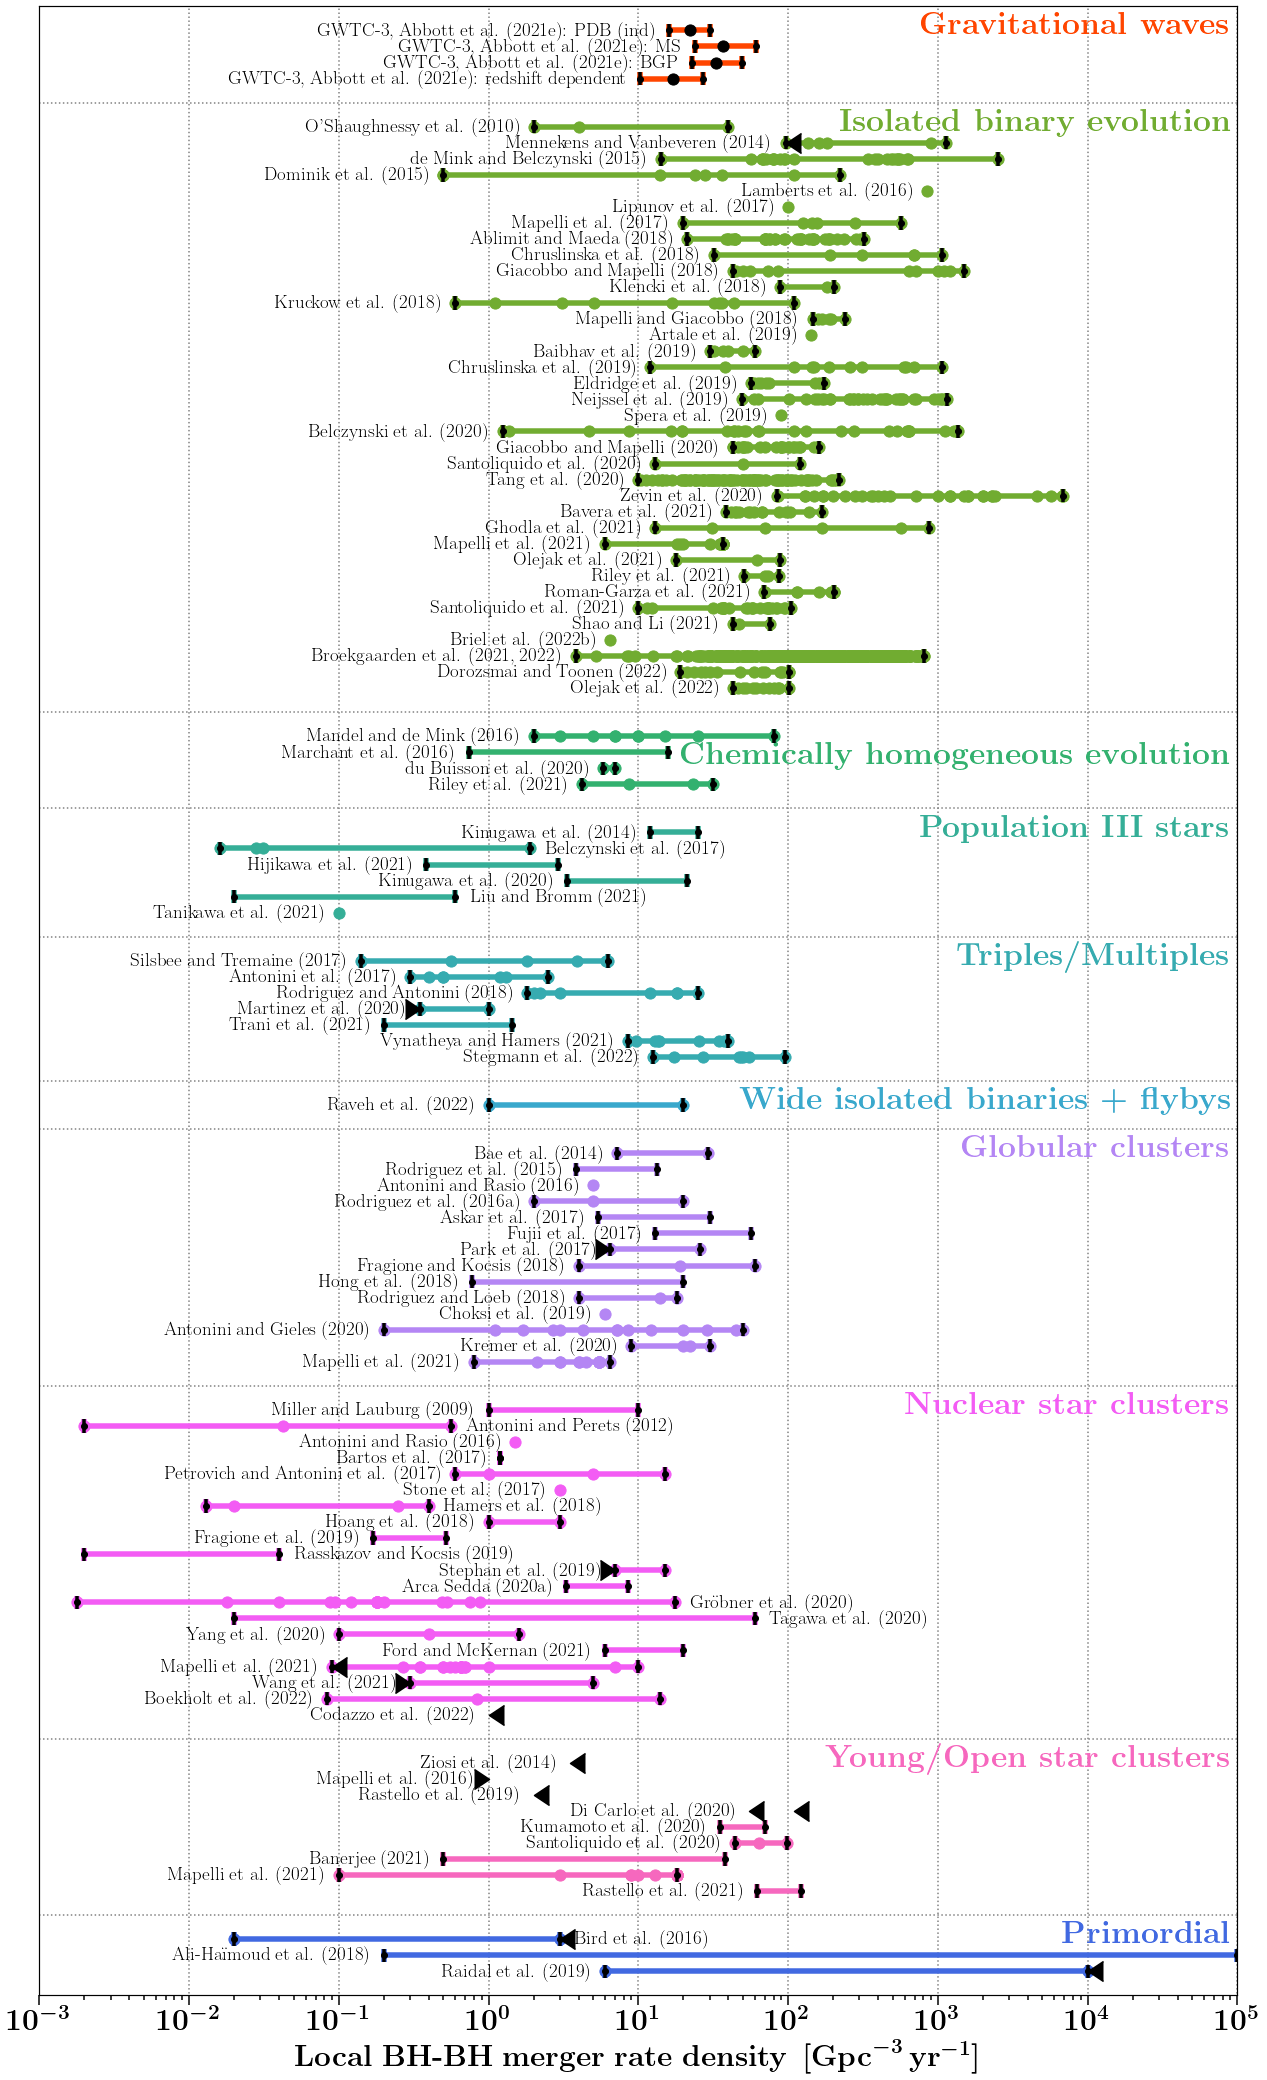

the total vertical length of the BHNS plot reaches: -73 this is information floor uses for deciding the length of the figure - ignore this


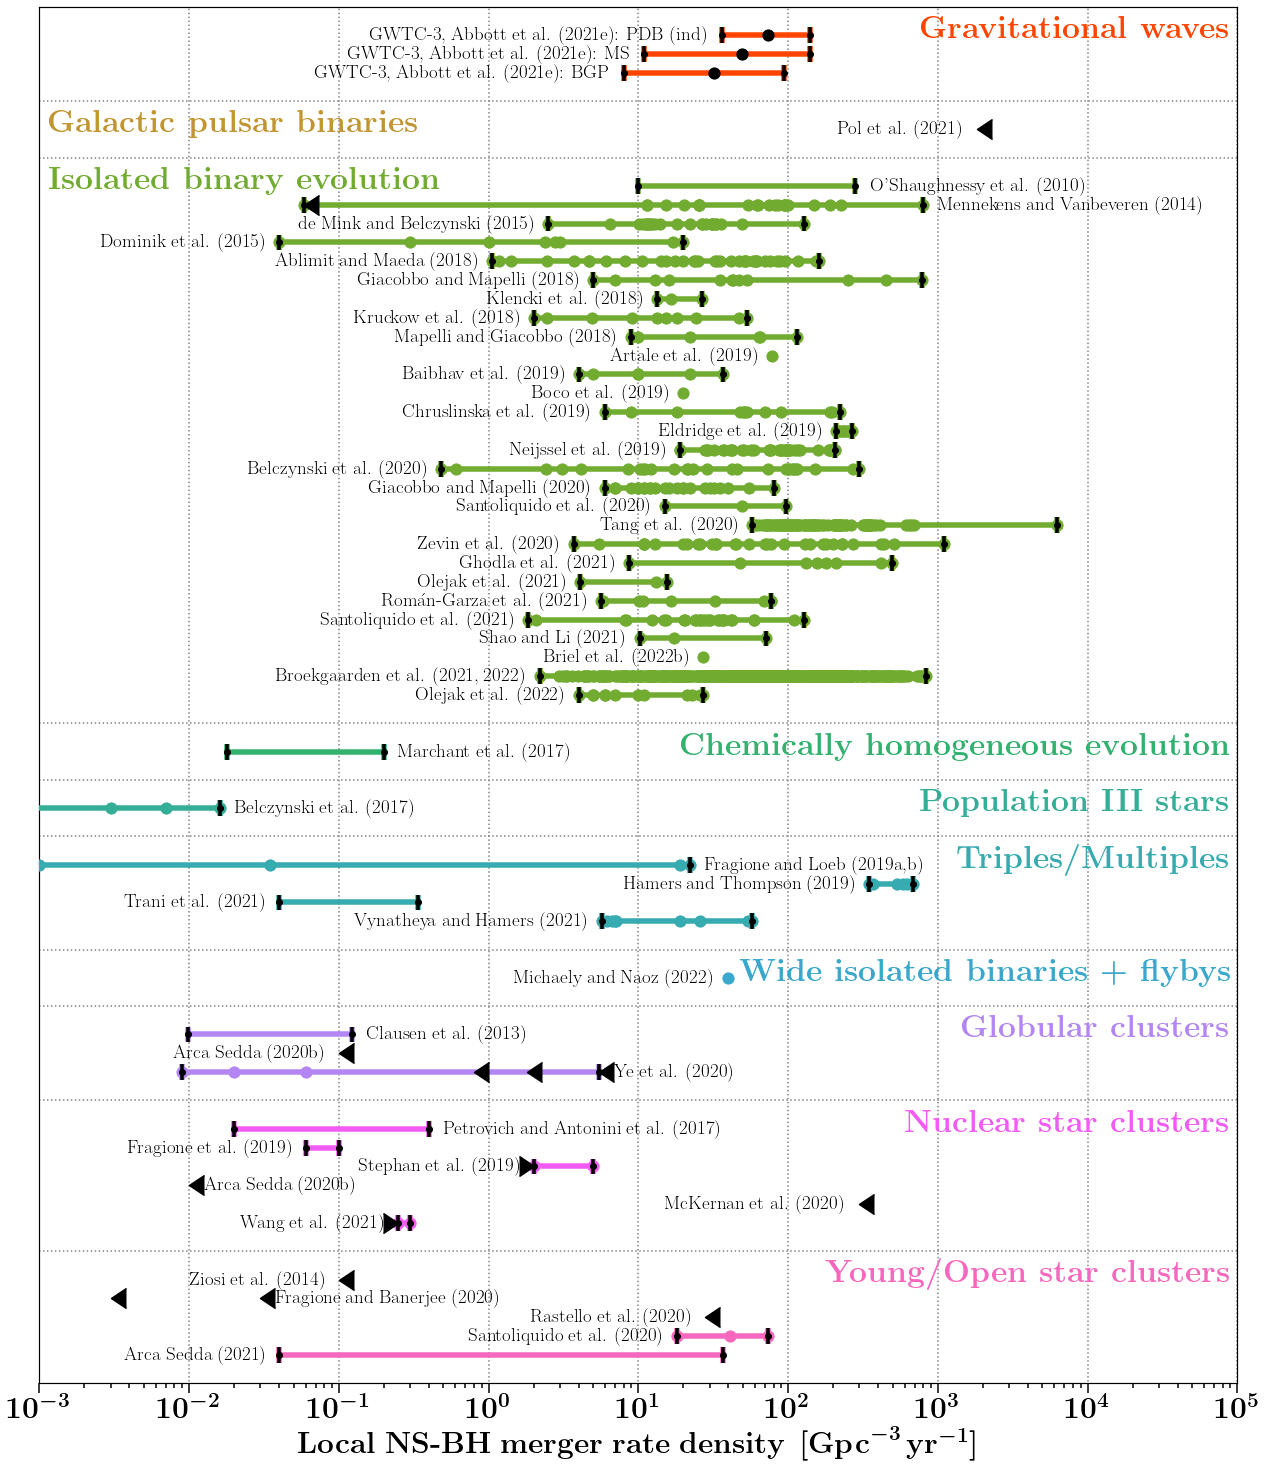

the total vertical length of the NSNS plot reaches: -86 this is information floor uses for deciding the length of the figure - ignore this


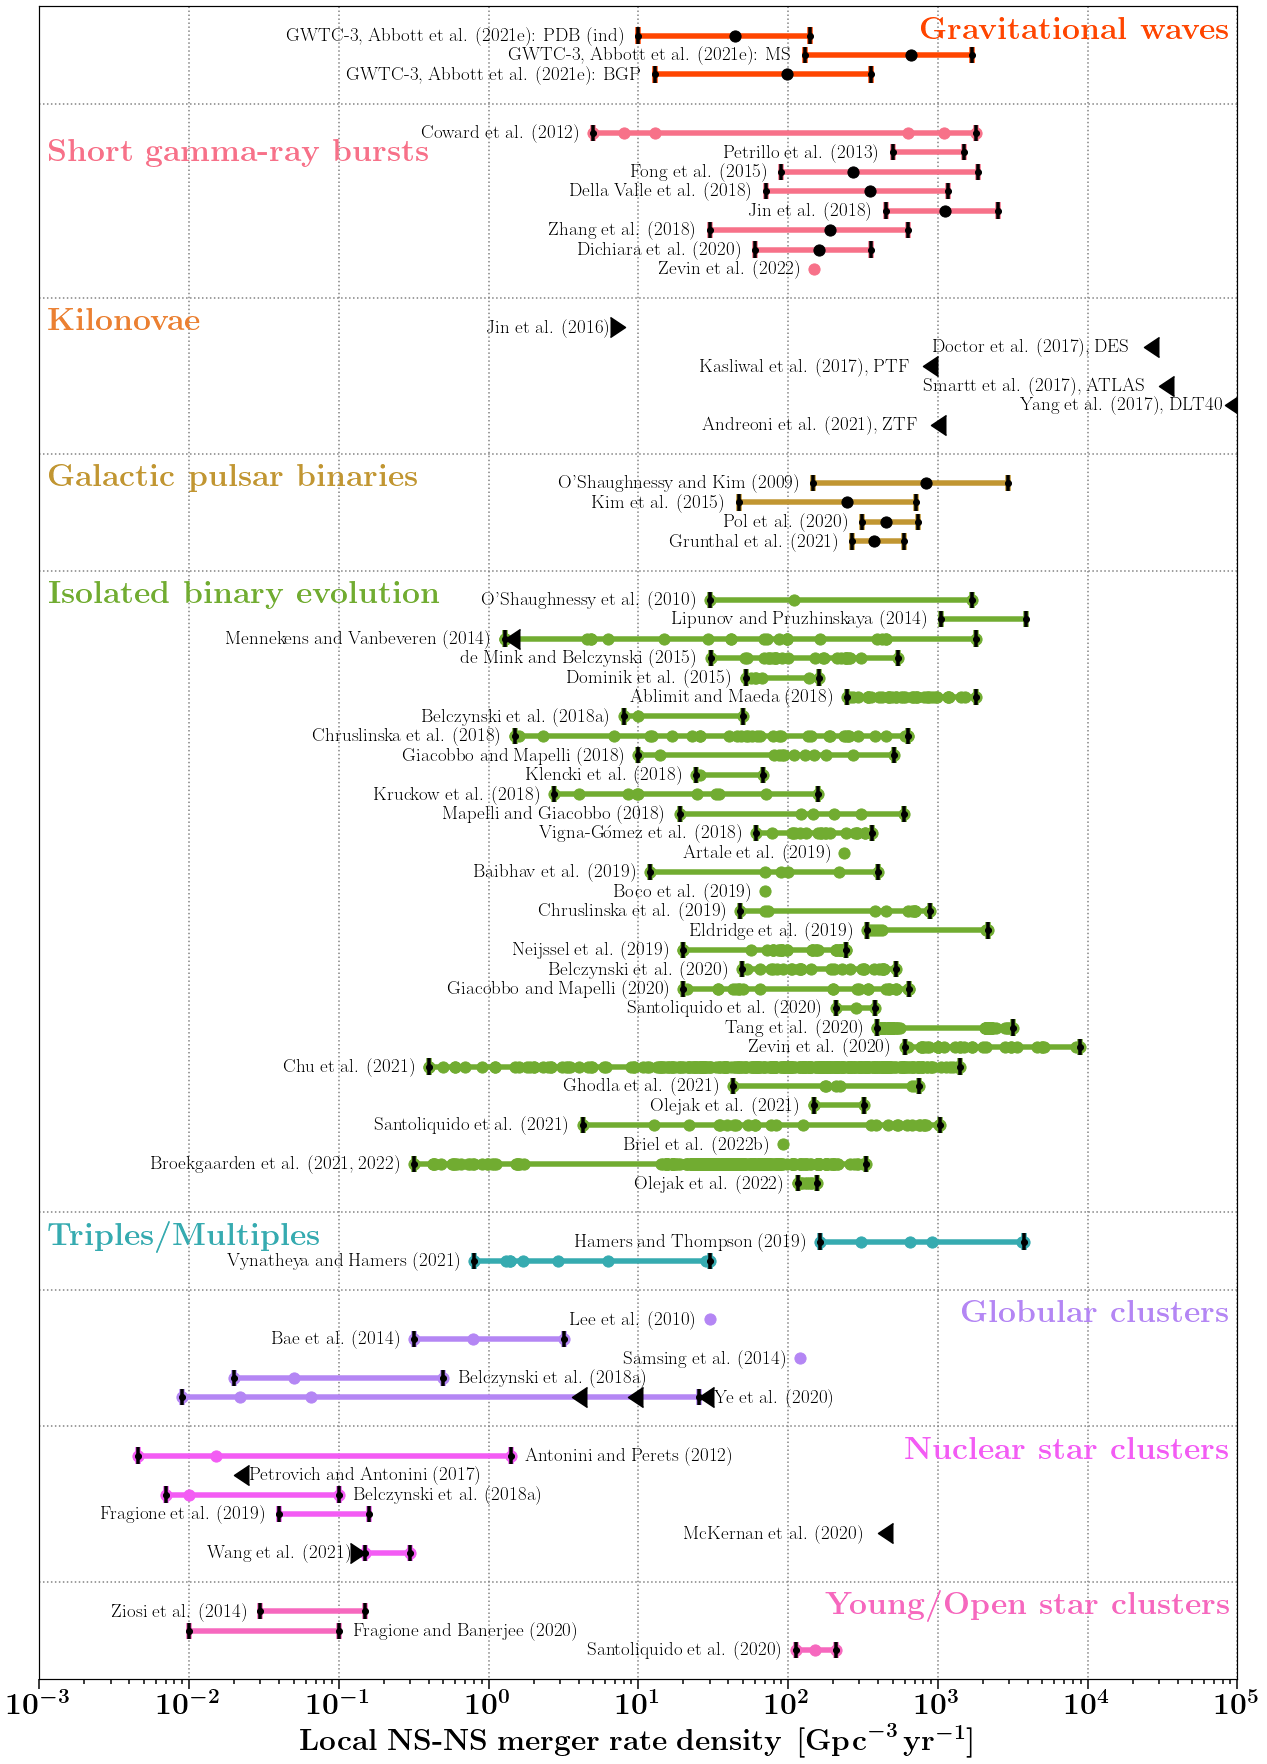

In [3]:
# make the BH-BH rates comparison figure 
make_figure(DCOtype='BHBH', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR')
make_figure(DCOtype='BHNS', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR')
make_figure(DCOtype='NSNS', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR')



## Make main figure 

the total vertical length of the BHBH plot reaches: -124 this is information floor uses for deciding the length of the figure - ignore this


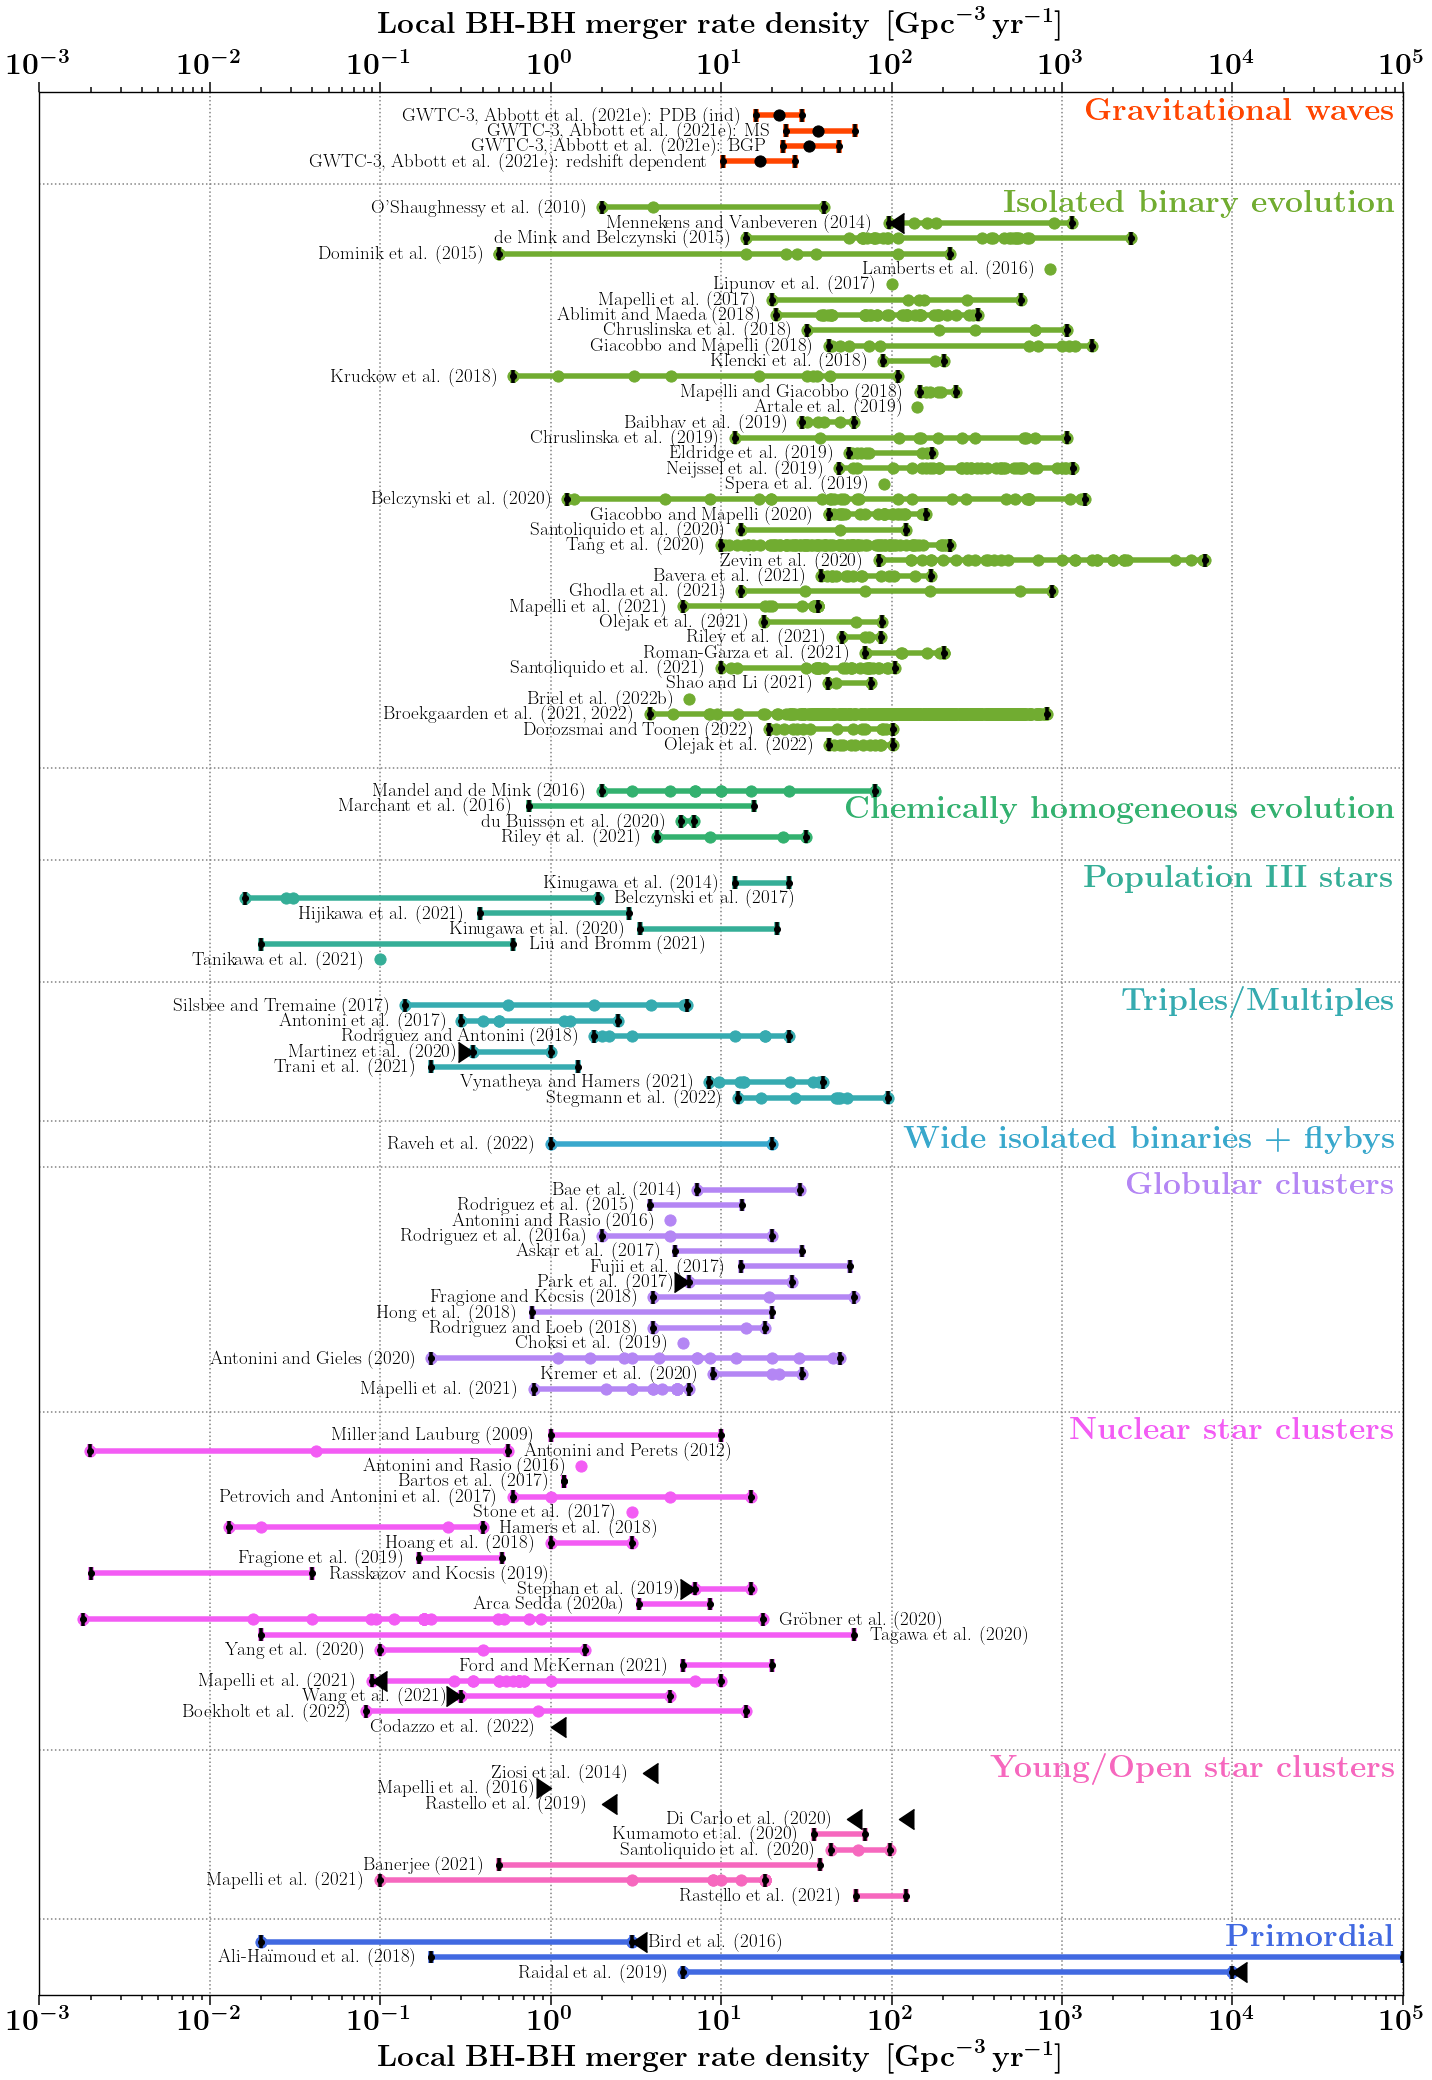

In [4]:
# make the BH-BH rates comparison figure 
make_figure(DCOtype='BHBH', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory)



the total vertical length of the BHNS plot reaches: -73 this is information floor uses for deciding the length of the figure - ignore this


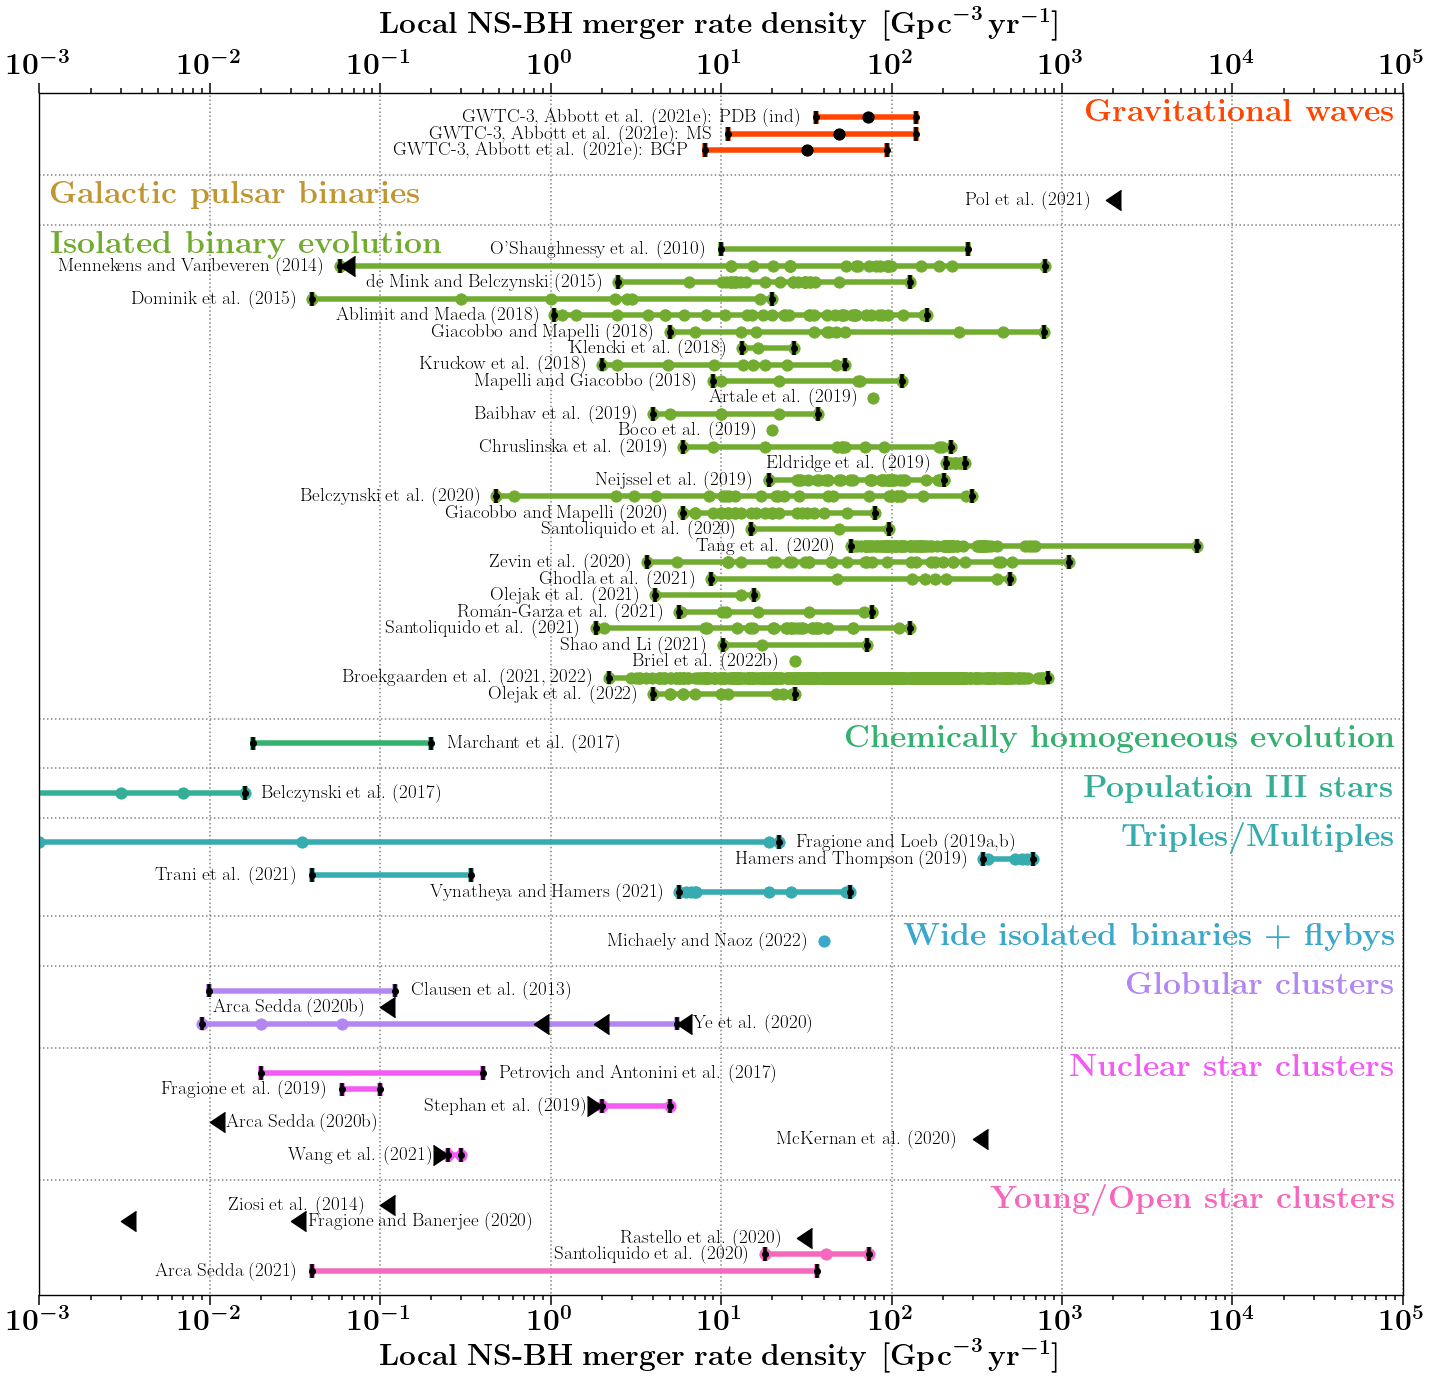

In [5]:
# make the NS-BH rates comparison figure 
make_figure(DCOtype='BHNS', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory)



the total vertical length of the NSNS plot reaches: -86 this is information floor uses for deciding the length of the figure - ignore this


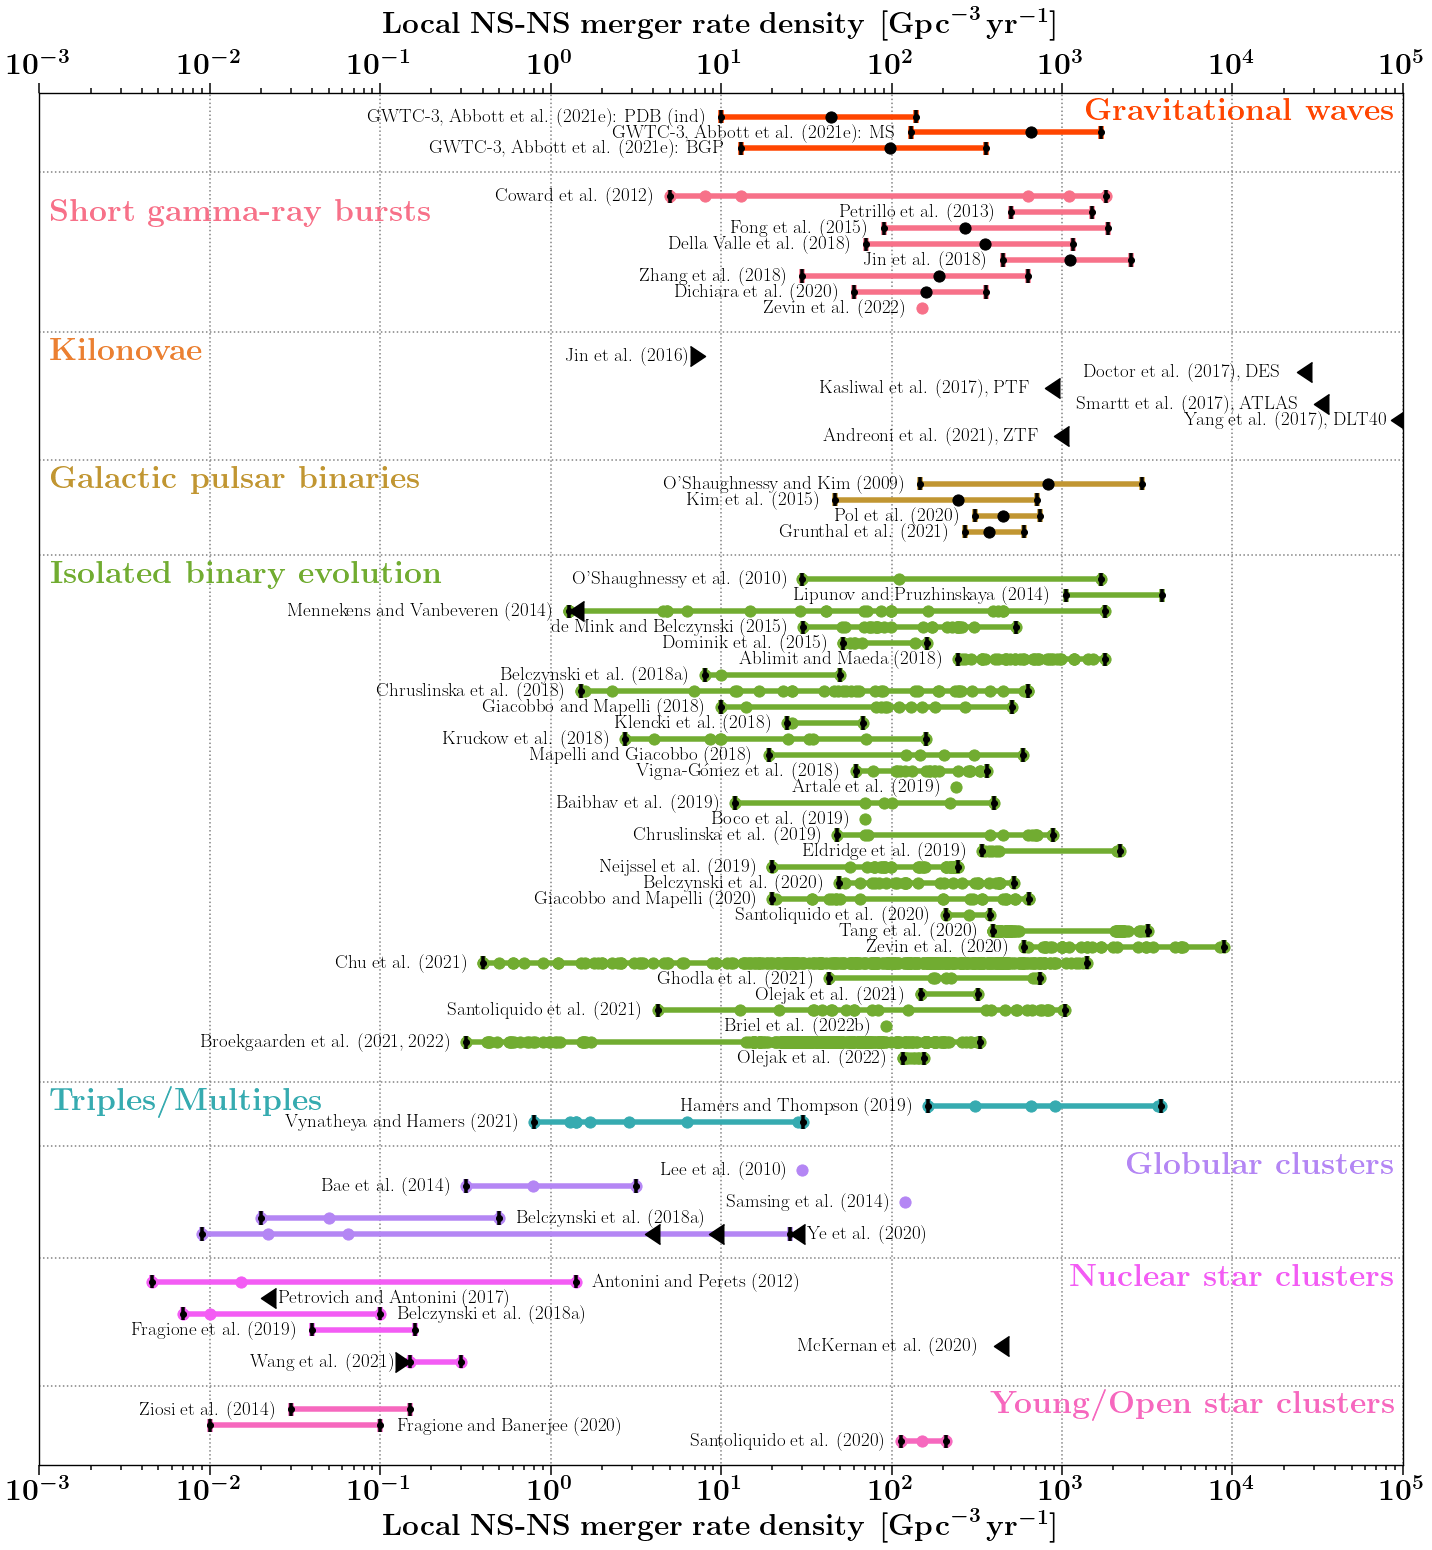

In [6]:
# make the NS-NS rates comparison figure 
make_figure(DCOtype='NSNS',ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory)



## Some code to create the color map used above (see the plotting scripts)

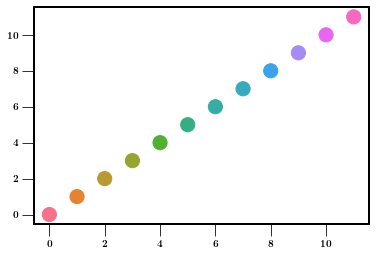

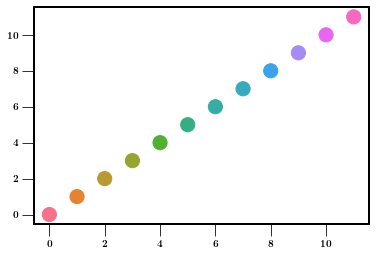

/Users/floorbroekgaarden/Library/Python/3.7/lib/python/site-packages/matplotlib/cbook/__init__.py:1061: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


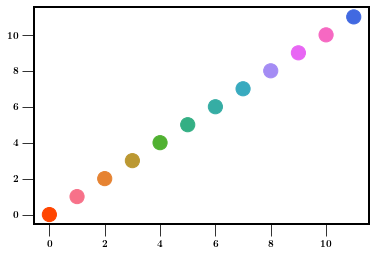

In [7]:


all_names = [ 'GWs', 'sGRBs', 'kilonovae', 'pulsars',\
                       'isolated binaries',  'CHE','pop-III','triples', 'dynamical: GC', 'dynamical: NC',  'dynamical: YSC',  'primordial']
colors = sns.color_palette("husl", len(all_names))   



# colors_is = 

name_colors = dict(zip(all_names, colors))

 
xx = range(len(all_names))
yy = xx

plt.scatter(xx,yy, c=colors, s=200)
plt.show()


colors = sns.color_palette("husl", 12)
xx = range(len(colors))
yy = xx

plt.scatter(xx,yy, c=colors, s=200)
plt.show()





c_GW = 'orangered'
c_GRB = sns.color_palette("husl", 12)[0] #  sns.color_palette("husl", 20)[1] 
c_kn = sns.color_palette("husl", 12)[1] #'darkgoldenrod' #sns.color_palette("husl", 20)[3]
c_psr =  sns.color_palette("husl", 12)[2]# "orange"

c_iso = sns.color_palette("husl", 12)[4] #  sns.color_palette("husl", 20)[6] #'limegreen'
c_che = sns.color_palette("husl", 12)[5] #"forestgreen" #sns.color_palette("husl", 20)[8]
c_popIII = sns.color_palette("husl", 12)[6] # "c" #"turquoise" # sns.color_palette("husl", 20)[12]
c_trip = sns.color_palette("husl", 12)[7] #"royalblue" #sns.color_palette("husl", 20)[13]

c_GC =  sns.color_palette("husl", 12)[9] #sns.color_palette("husl", 20)[15] 
c_NC = sns.color_palette("husl", 12)[10] # "blueviolet" #
c_YC =  sns.color_palette("husl", 12)[11] # "magenta"

c_prim = "royalblue" #"brown"


colors = [c_GW, c_GRB, c_kn, c_psr, c_iso, c_che, c_popIII, c_trip, c_GC, c_NC, c_YC, c_prim]
xx = range(len(colors))
yy = xx

plt.scatter(xx,yy, c=colors, s=200)
plt.show()